# Analysing COVID-19 increase rate vs Other Life Parameters
------------------------------------------

### Let's Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


### Importing COVID-19 dataset

In [2]:
covid_dataset = pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
covid_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [3]:
covid_dataset.shape

(266, 104)

### Delete the useless columns

As we are going to analyse data across countries there is no need of Latitude and Longitude columns. So we can delete them.

In [4]:
covid_dataset = covid_dataset.drop(["Lat","Long"],axis=1)

In [5]:
covid_dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Aggregating the rows by the country

We will be working across Country so lets group data across country.

In [6]:
covid_dataset_agg = covid_dataset.groupby("Country/Region").sum()

In [7]:
covid_dataset_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
covid_dataset_agg.shape

(187, 100)

### Visualizing data related to a country for example India
visualization always helps for better understanding of our data.

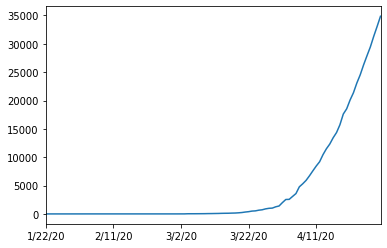

In [9]:
covid_dataset_agg.loc["India"].plot()

### Calculating a good measure 
We need to find a good measure reperestend as a number, describing the spread of the virus in a country. 
We need this so that we can remove date wise representation of data.

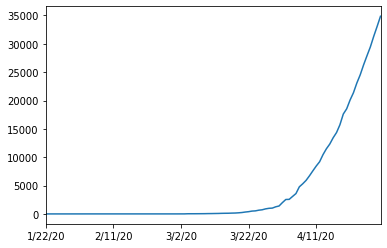

In [10]:
covid_dataset_agg.loc['India'].plot()

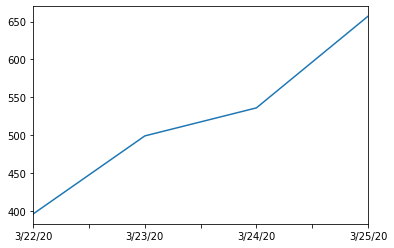

In [11]:
covid_dataset_agg.loc['India']["3/22/20":"3/25/20"].plot()

### Caculating the first derivative of the curve

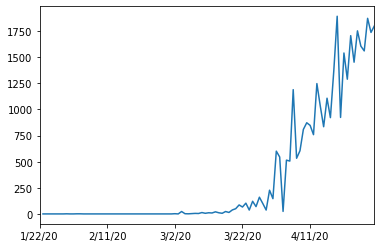

In [12]:
covid_dataset_agg.loc['India'].diff().plot()

### Finding maxmimum infection rate for India,China and Pakistan

In [13]:
covid_dataset_agg.loc['India'].diff().max()

1893.0

In [14]:
covid_dataset_agg.loc['China'].diff().max()

15136.0

In [15]:
covid_dataset_agg.loc['Pakistan'].diff().max()

1292.0

So we can see that the maximum increase in Corona Cases in India is **1893** in one day till 11th of April.

### Finding maximum infection rate for all of the countries. 

In [16]:
countries = covid_dataset_agg.index
countries

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=187)

In [17]:
max_all_countries = []
for c in countries:
    max_all_countries.append(covid_dataset_agg.loc[c].diff().max())
max_all_countries

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [18]:
covid_dataset_agg["max_cases_incr"] = max_all_countries

In [19]:
covid_dataset_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_cases_incr
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Creating a new dataframe with only needed column 

Since we have calculated the maximum increase in a single day for every country we dont need the daily data. So we can create a new dataset with just the max_cases_incr column.

In [20]:
final_df_covid = pd.DataFrame(covid_dataset_agg["max_cases_incr"])
final_df_covid.head()

,max_cases_incr
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Importing the world happiness report dataset

In [21]:
world_happiness_report = pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [22]:
world_happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Let's drop the useless columns 

In [23]:
not_needed = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [24]:
world_happiness_report.drop(not_needed,axis=1,inplace=True)
world_happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Changing the indices of the dataframe

In [25]:
world_happiness_report.set_index("Country or region",inplace=True)
world_happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Now let's join two dataset we have prepared  

#### Corona Dataset :

In [26]:
final_df_covid.shape

(187, 1)

#### World Happiness Report Dataset :

In [27]:
world_happiness_report.shape

(156, 4)

Since the shapes are not same we can go with inner joins.

In [28]:
dataset = final_df_covid.join(world_happiness_report,how="inner")
dataset.head()

,max_cases_incr,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Correlation matrix 

It's time for results. We will be ploting correlation matrix to show the correlation of each column with every other column.

In [29]:
dataset.corr()

,max_cases_incr,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_cases_incr,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


We see that the diagonal is 1.000000 as the correlation between 2 same columns will be obviously 100%.


### Visualization of the results
Our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis.

### Plotting GDP vs maximum Infection rate

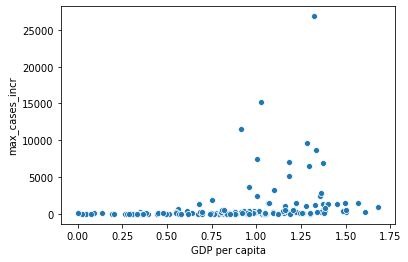

In [30]:
x = dataset["GDP per capita"]
y = dataset["max_cases_incr"]
sns.scatterplot(x,y)

From the above plot we are unable to reach to a conclusion because we cannot identify whether the plot is positive inclined or negative. This is because of the difference in the range of x and y axis. x - axis is in the range 0 to 1.75 whereas y - axis is in the range of 0 to 25000. So lets **log scale** y axis.

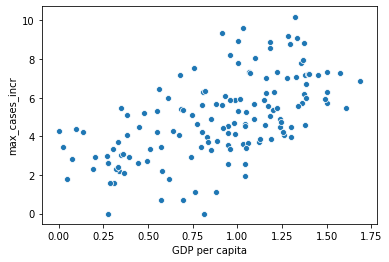

In [31]:
sns.scatterplot(x,np.log(y))

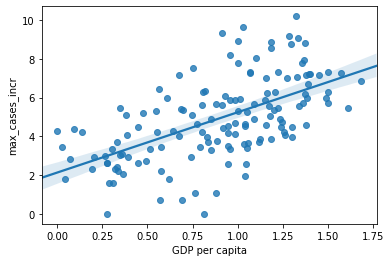

In [32]:
sns.regplot(x,np.log(y))

So if we plot a regplot we can see a line which shows whether the slope is positive or negative.

From the above plot we can conclude that with increase in GDP per capita there is an increase in number of cases.

Lets plot regplot for rest of them.

### Plotting Social support vs maximum Infection rate

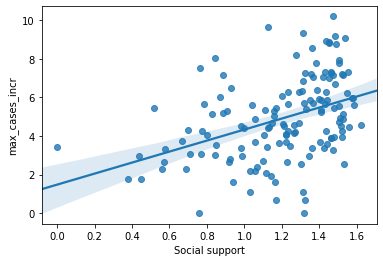

In [33]:
x = dataset["Social support"]
y = dataset["max_cases_incr"]
sns.regplot(x,np.log(y))

From the above plot we can conclude that with increase in Social support there is an increase in number of cases.

###  Plotting Healthy life expectancy vs maximum Infection rate

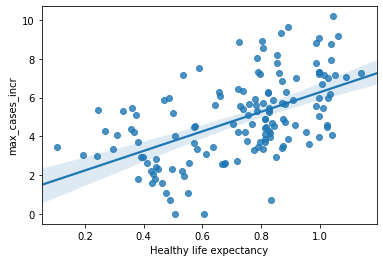

In [34]:
x = dataset["Healthy life expectancy"]
y = dataset["max_cases_incr"]
sns.regplot(x,np.log(y))

From the above plot we can conclude that with increase in Healthy life expectancy there is an increase in number of cases.

### Plotting Freedom to make life choices vs maximum Infection rate

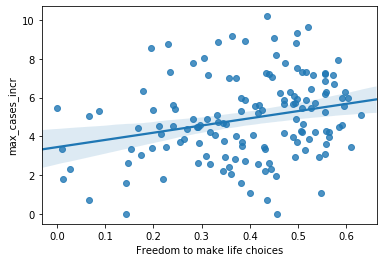

In [35]:
x = dataset["Freedom to make life choices"]
y = dataset["max_cases_incr"]
sns.regplot(x,np.log(y))

From the above plot we can conclude that with increase in Freedom to make life choices there is an increase in number of cases.

# Thank You !